# Within Node

In this prototype the FPGA node uses 4 channels or a single channel to communicate with each other. The evaluation uses only single Noctua Node fpga-00016 and the two FPGAs connected to it via PCIe

In [96]:
%matplotlib notebook
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np
import matplotlib.patches as patches
import matplotlib.ticker as ticker

head = ('size', 'floats8', 'efloats', 'time', 'min', 'max', 'avgBw')
data_inter_irreg = pd.read_csv('inter_irreg_nobank_single_100_b.txt', delimiter=',', names=head, skiprows=[0]) 
data_inter_reg = pd.read_csv('inter_reg_nobank_single_100_b.txt', delimiter=',', names=head, skiprows=[0])
data_non_irreg = pd.read_csv('ni_irreg_nobank_single_100_b.txt', delimiter=',', names=head, skiprows=[0]) 
data_non_reg = pd.read_csv('ni_reg_nobank_single_100_b.txt', delimiter=',', names=head, skiprows=[0]) 
# print(data_inter_irreg)
data_inter_irreg['avgBw'] = data_inter_irreg['avgBw'].mul(1024 *1024).div(1000000)
data_inter_reg['avgBw'] = data_inter_reg['avgBw'].mul(1024 *1024).div(1000000)
data_non_irreg['avgBw'] = data_non_irreg['avgBw'].mul(1024 *1024).div(1000000)
data_non_reg['avgBw'] = data_non_reg['avgBw'].mul(1024 *1024).div(1000000)

# print(data_inter_irreg)
data_inter_irreg_all = pd.read_csv('inter_irreg_nobank_all_100_b.txt', delimiter=',', names=head, skiprows=[0]) 
data_inter_reg_all = pd.read_csv('inter_reg_nobank_all_100_b.txt', delimiter=',', names=head, skiprows=[0])
data_non_irreg_all = pd.read_csv('ni_irreg_nobank_all_100_b.txt', delimiter=',', names=head, skiprows=[0]) 
data_non_reg_all = pd.read_csv('ni_reg_nobank_all_100_b.txt', delimiter=',', names=head, skiprows=[0]) 

data_inter_irreg_all['avgBw'] = data_inter_irreg_all['avgBw'].mul(1024 *1024).div(1000000)
data_inter_reg_all['avgBw'] = data_inter_reg_all['avgBw'].mul(1024 *1024).div(1000000)
data_non_irreg_all['avgBw'] = data_non_irreg_all['avgBw'].mul(1024 *1024).div(1000000)
data_non_reg_all['avgBw'] = data_non_reg_all['avgBw'].mul(1024 *1024).div(1000000)

head = ('size', 'floats', 'time', 'min', 'max', 'avgBw')
data_reg_N2 = pd.read_csv('reg_N2_100.txt', delimiter=',', names=head, skiprows=[0]) 
data_reg_N4 = pd.read_csv('reg_N4_100.txt', delimiter=',', names=head, skiprows=[0]) 
data_irreg_N2 = pd.read_csv('irreg_N2_100.txt', delimiter=',', names=head, skiprows=[0]) 
data_irreg_N4 = pd.read_csv('irreg_N4_100.txt', delimiter=',', names=head, skiprows=[0])

data_reg_N2['min'] = data_reg_N2['avgBw'] - data_reg_N2['min']
data_reg_N2['max'] = data_reg_N2['max'] - data_reg_N2['avgBw']

data_irreg_N2['min'] = data_irreg_N2['avgBw'] - data_irreg_N2['min']
data_irreg_N2['max'] = data_irreg_N2['max'] - data_irreg_N2['avgBw']

data_reg_N4['min'] = data_reg_N4['avgBw'] - data_reg_N4['min']
data_reg_N4['max'] = data_reg_N4['max'] - data_reg_N4['avgBw']

data_irreg_N4['min'] = data_irreg_N4['avgBw'] - data_irreg_N4['min']
data_irreg_N4['max'] = data_irreg_N4['max'] - data_irreg_N4['avgBw']

data_reg_N2['avgBw'] = data_reg_N2['avgBw'].mul(1024 *1024).div(1000000)
data_reg_N4['avgBw'] = data_reg_N4['avgBw'].mul(1024 *1024).div(1000000)
data_irreg_N2['avgBw'] = data_irreg_N2['avgBw'].mul(1024 *1024).div(1000000)
data_irreg_N4['avgBw'] = data_irreg_N4['avgBw'].mul(1024 *1024).div(1000000)



head = ('size', 'floats8', 'efloats', 'time', 'e_time', 'min', 'max', 'avgBw')
data1 = pd.read_csv('rl_noninter_b_100.out', delimiter=',', names=head, skiprows=[0]) 
data3 = pd.read_csv('irl_noninter_b_100.out', delimiter=',', names=head, skiprows=[0]) 
data5 = pd.read_csv('rl_inter_nb_100.out', delimiter=',', names=head, skiprows=[0]) 
data6 = pd.read_csv('irl_inter_nb_100.out', delimiter=',', names=head, skiprows=[0]) 

data1['min'] = data1['avgBw'] - data1['min']
data1['max'] = data1['max'] - data1['avgBw']

data3['min'] = data3['avgBw'] - data3['min']
data3['max'] = data3['max'] - data3['avgBw']

data5['min'] = data5['avgBw'] - data5['min']
data5['max'] = data5['max'] - data5['avgBw']

data6['min'] = data6['avgBw'] - data6['min']
data6['max'] = data6['max'] - data6['avgBw']

data1['meanBw'] = data1.groupby(np.arange(len(data1)) // 2)['avgBw'].transform('mean')
data3['meanBw'] = data3.groupby(np.arange(len(data3)) // 2)['avgBw'].transform('mean')
data5['meanBw'] = data5.groupby(np.arange(len(data5)) // 2)['avgBw'].transform('mean')
data6['meanBw'] = data6.groupby(np.arange(len(data6)) // 2)['avgBw'].transform('mean')

data1['meanBw'] = data1['meanBw'].mul(1024 *1024).div(1000000)
data3['meanBw'] = data3['meanBw'].mul(1024 *1024).div(1000000)
data5['meanBw'] = data5['meanBw'].mul(1024 *1024).div(1000000)
data6['meanBw'] = data6['meanBw'].mul(1024 *1024).div(1000000)

plt.rc('axes', titlesize=10)
plt.rc('legend', fontsize=8)
plt.rc('axes', labelsize=8)

def circle(xy, radius, fig, ax, kwargs=None):
    # Get current figure and axis
#     fig = plt.gcf()
#     ax = fig.gca()

    # Calculate figure dimension ratio width/height
    pr = fig.get_figwidth()/fig.get_figheight()

    # Get the transScale (important if one of the axis is in log-scale)
    tscale = ax.transScale + (ax.transLimits + ax.transAxes)
    ctscale = tscale.transform_point(xy)
    cfig = fig.transFigure.inverted().transform(ctscale)

    # Create circle
    if kwargs == None:
        circ = patches.Ellipse(cfig, radius, radius*pr,
                transform=fig.transFigure)
    else:
        circ = patches.Ellipse(cfig, radius, radius*pr,
                transform=fig.transFigure, **kwargs)

    # Draw circle
    ax.add_artist(circ)
    ax.legend(handles=[circ])

def find_add_patch(data, fig, ax, value, per, color):
    for index, entry in data[['size', 'avgBw']].iterrows():
#     print("out"+str(entry['avgBw']))
        if entry['avgBw'] > value*per:
            print(str(entry['size'])+":"+str(entry['avgBw']))
#             el = circle((entry['size']/(1024),entry['avgBw']), 0.02,fig, ax, {'color':color, 'clip_on': False})
#             figk_ax.add_patch(el)
            figk_ax.axvline(x=(entry['size']/(1024)), linestyle='--', color='m')
#             figk_ax.annotate(string, xy=(entry['size']/(1024),entry['avgBw']), color=color, xycoords='data', xytext=(-10, -40),
#                              textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
            break

def get_max_bw(data):
    maxVal = max(data['avgBw'])
    return maxVal

def get_max_mbw(data):
    return max(data['meanBw'])

def format_yaxis(value, tick_number):
    print(value, tick_number)
    
    return float("{0:.1f}".format((value * 1024 *1024)/1000000))
#     return value
def format_xaxis(value, tick_number):
#     if()
    datasize = float("{0:.2f}".format(value/(1024*1024)))
#     print(value, tick_number, datasize)
    return datasize

# def plot_data(y, x, linetype, label=None):
    
divfactor = 1024*1024


<IPython.core.display.Javascript object>


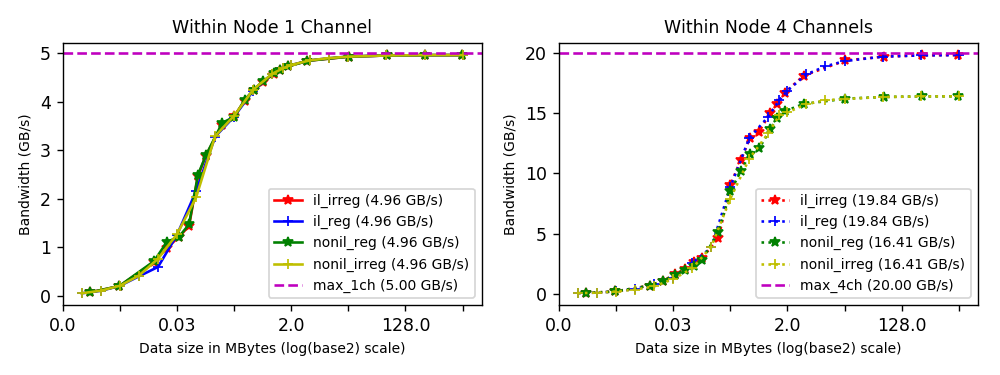

In [50]:
%matplotlib notebook


figk_fig, figk_ax  = plt.subplots(ncols=2, nrows=1, figsize=(8,3), tight_layout=True)

figk_ax[0].plot(data_inter_irreg['size'], data_inter_irreg['avgBw'].div(1000), 'r*-',
                label='il_irreg (%.2f GB/s)' %(get_max_bw(data_inter_irreg)/1000))
figk_ax[0].plot(data_inter_reg['size'], data_inter_reg['avgBw'].div(1000), 'b+-', label='il_reg (%.2f GB/s)' %(get_max_bw(data_inter_reg)/1000))
figk_ax[0].plot(data_non_irreg['size'], data_non_irreg['avgBw'].div(1000), 'g*-', label='nonil_reg (%.2f GB/s)' %(get_max_bw(data_non_irreg)/1000))
figk_ax[0].plot(data_non_reg['size'], data_non_reg['avgBw'].div(1000), 'y+-', label='nonil_irreg (%.2f GB/s)' %(get_max_bw(data_non_reg)/1000))
figk_ax[0].axhline(y=5000/1000, linestyle='--', color='m', label='max_1ch (%.2f GB/s)'% 5)

figk_ax[0].set_xscale('log', basex=2)
figk_ax[0].xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis))
for label in figk_ax[0].get_xticklabels()[::2]:
    label.set_visible(False)

figk_ax[0].set_xlabel('Data size in MBytes (log(base2) scale)')
figk_ax[0].set_ylabel('Bandwidth (GB/s)')
figk_ax[0].set_title("\n".join(wrap("Within Node 1 Channel", 60)))
figk_ax[0].legend()

# figk_fig1, figk_ax1  = plt.subplots(figsize=(5,2), tight_layout=True)

figk_ax[1].plot(data_inter_irreg_all['size'], data_inter_irreg_all['avgBw'].div(1000), 'r*:',
             label='il_irreg (%.2f GB/s)' %(get_max_bw(data_inter_irreg_all)/1000))
figk_ax[1].plot(data_inter_reg_all['size'], data_inter_reg_all['avgBw'].div(1000), 'b+:',
             label='il_reg (%.2f GB/s)' %(get_max_bw(data_inter_reg_all)/1000))
figk_ax[1].plot(data_non_irreg_all['size'], data_non_irreg_all['avgBw'].div(1000), 'g*:',
             label='nonil_reg (%.2f GB/s)' %(get_max_bw(data_non_irreg_all)/1000))
figk_ax[1].plot(data_non_reg_all['size'], data_non_reg_all['avgBw'].div(1000), 'y+:',
             label='nonil_irreg (%.2f GB/s)' %(get_max_bw(data_non_reg_all)/1000))
figk_ax[1].axhline(y=20, linestyle='--', color='m', label='max_4ch (%.2f GB/s)' % 20)
# locs = figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
figk_ax[1].set_xscale('log', basex=2)
figk_ax[1].xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
for label in figk_ax[1].get_xticklabels()[::2]:
    label.set_visible(False)

figk_ax[1].set_xlabel('Data size in MBytes (log(base2) scale)')
figk_ax[1].set_ylabel('Bandwidth (GB/s)')
figk_ax[1].set_title("\n".join(wrap("Within Node 4 Channels", 60)))
figk_ax[1].legend()

# figk_ax.set_aspect(1.0/figk_ax.get_data_ratio()*0.5)
# figk_fig(figsize=(5.8, 3.0))
figk_fig.savefig("wn.pgf")
plt.savefig("wn.pdf")


# Within Node 4 Channels

<IPython.core.display.Javascript object>


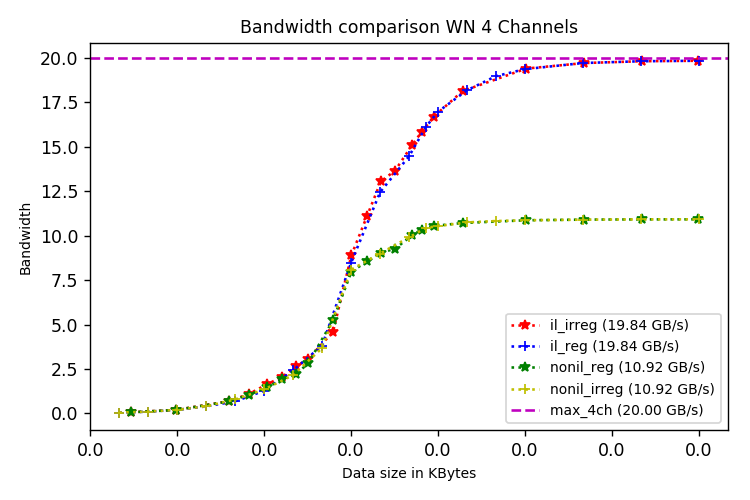

In [32]:
%matplotlib notebook

figk_fig, figk_ax  = plt.subplots(figsize=(6,4), tight_layout=True)

figk_ax.plot(data_inter_irreg_all['size'].div(1024*1024), data_inter_irreg_all['avgBw'].div(1000), 'r*:',
             label='il_irreg (%.2f GB/s)' %(get_max_bw(data_inter_irreg_all)/1000))
figk_ax.plot(data_inter_reg_all['size'].div(1024*1024), data_inter_reg_all['avgBw'].div(1000), 'b+:',
             label='il_reg (%.2f GB/s)' %(get_max_bw(data_inter_reg_all)/1000))
figk_ax.plot(data_non_irreg_all['size'].div(1024*1024), data_non_irreg_all['avgBw'].div(1000), 'g*:',
             label='nonil_reg (%.2f GB/s)' %(get_max_bw(data_non_irreg_all)/1000))
figk_ax.plot(data_non_reg_all['size'].div(1024*1024), data_non_reg_all['avgBw'].div(1000), 'y+:',
             label='nonil_irreg (%.2f GB/s)' %(get_max_bw(data_non_reg_all)/1000))
figk_ax.axhline(y=20, linestyle='--', color='m', label='max_4ch (%.2f GB/s)' % 20)
figk_ax.set_xscale('log', basex=2)
figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
# for label in figk_ax.get_xticklabels()[::2]:
#     label.set_visible(False)

figk_ax.set_xlabel('Data size in KBytes')
figk_ax.set_ylabel('Bandwidth')
figk_ax.set_title("\n".join(wrap("Bandwidth comparison WN 4 Channels", 60)))
figk_ax.legend()

## MPI FPGA prototype analysis

The MPI FPGA prototype serves as a reference design which uses similar data communication pattern as of MIDG2 application. The communication is done over the network by the HOST and the data between HOST and FPGA is exchanged using PCIe.

<IPython.core.display.Javascript object>


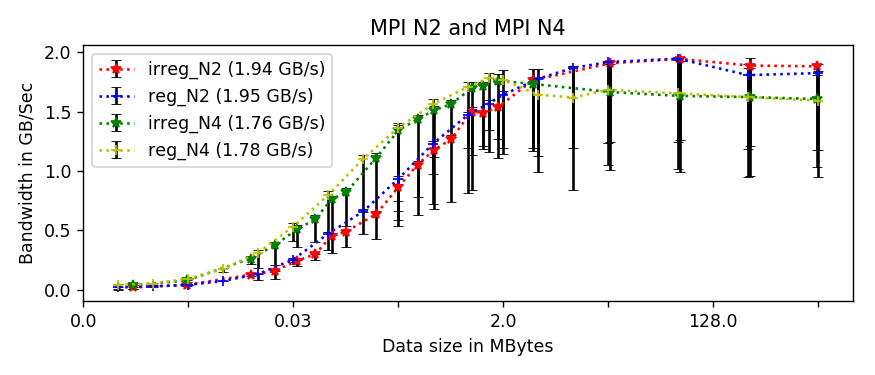

0.70675
0.7014199999999998
0.67878
0.7807000000000001


In [105]:
%matplotlib notebook

plt.rc('axes', titlesize=12)
plt.rc('legend', fontsize=10)
plt.rc('axes', labelsize=10)

figk_fig, figk_ax  = plt.subplots(figsize=(7,3), tight_layout=True)
peak_bw = 2995/1000
# figk_ax.plot(data_irreg_N2['size'], data_irreg_N2['avgBw'].div(1000), 'r*:', label='irreg_N2 (%.2f GB/s)' %(get_max_bw(data_irreg_N2)/1000))
# figk_ax.plot(data_reg_N2['size'], data_reg_N2['avgBw'].div(1000), 'b+:', label='reg_N2 (%.2f GB/s)' %(get_max_bw(data_reg_N2)/1000))
# figk_ax.plot(data_irreg_N4['size'], data_irreg_N4['avgBw'].div(1000), 'g*:', label='irreg_N4 (%.2f GB/s)' %(get_max_bw(data_irreg_N4)/1000))
# figk_ax.plot(data_reg_N4['size'], data_reg_N4['avgBw'].div(1000), 'y+:', label='reg_N4 (%.2f GB/s)' %(get_max_bw(data_reg_N4)/1000))
err = data_irreg_N2[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax.errorbar(data_irreg_N2['size'], data_irreg_N2['avgBw'].div(1000),
             yerr=err, color='red', ls=':',
             marker='*', capsize=3, capthick=0.5, ecolor='black',
             label='irreg_N2 (%.2f GB/s)' %(get_max_bw(data_irreg_N2)/1000))
err = data_reg_N2[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax.errorbar(data_reg_N2['size'], data_reg_N2['avgBw'].div(1000),
             yerr=err, color='b', ls=':',
            marker='+', capsize=3, capthick=0.5, ecolor='black',
             label='reg_N2 (%.2f GB/s)' %(get_max_bw(data_reg_N2)/1000))
err = data_irreg_N4[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax.errorbar(data_irreg_N4['size'], data_irreg_N4['avgBw'].div(1000),
             yerr=err, color='g', ls=':',
             marker='*', capsize=3, capthick=0.5, ecolor='black',
             label='irreg_N4 (%.2f GB/s)' %(get_max_bw(data_irreg_N4)/1000))
err = data_reg_N4[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax.errorbar(data_reg_N4['size'], data_reg_N4['avgBw'].div(1000),
             yerr=err, color='y', ls=':',
             marker='+', capsize=3, capthick=0.5, ecolor='black',
             label='reg_N4 (%.2f GB/s)' %(get_max_bw(data_reg_N4)/1000))

# figk_ax.axhline(y=2995/1000, linestyle='--', color='m', label='max (%.2f GB/s)' % peak_bw)
figk_ax.set_xscale('log', basex=2)
figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
for label in figk_ax.get_xticklabels()[::2]:
    label.set_visible(False)
figk_ax.set_xlabel('Data size in MBytes (log(base2)')
figk_ax.set_ylabel('Bandwidth in GB/Sec')
figk_ax.set_title("\n".join(wrap("MPI N2 and MPI N4", 60)))
figk_ax.legend()
figk_fig.savefig("mpipcie.pgf")
plt.savefig("mpipcie.pdf")

## Fully connected

This topology uses three channels to connect to 3 neighbouring nodes, 1 from the same node and 2 from the another node. This has the benefit of transferring more data with the same channel which is good for lower sizes

<IPython.core.display.Javascript object>


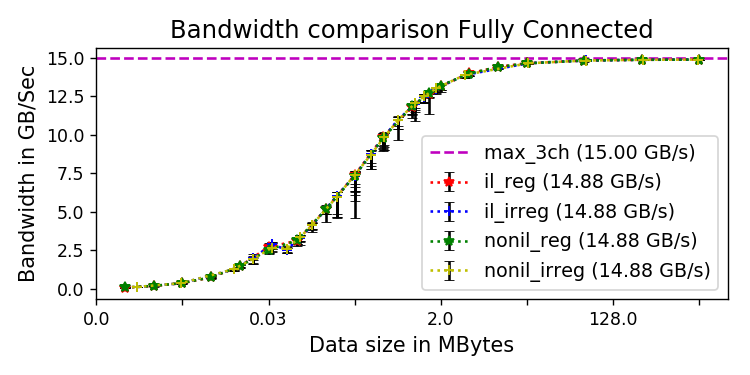

1.323300000000001
1.3216400000000004
1.6032700000000004
          size      min     max
0         1368    15.16    6.05
1         1368     7.32    5.53
2         4000    18.05   18.44
3         4000    17.78   18.38
4        14112    43.64   80.71
5        14112    55.83   52.53
6        22680   340.24  199.90
7        22680    79.16   77.51
8        35280   222.74  345.90
9        35280   273.03  293.62
10       50760   222.94   93.67
11       50760   282.58  148.31
12       70080   250.56  148.19
13       70080   231.20  134.31
14       93744   229.90  116.62
15       93744   275.93  168.88
16      170160  1343.99  328.41
17      170160  1285.99  326.54
18      264000   611.53  249.59
19      264000  2789.67  230.95
20      385560   926.46  335.49
21      385560   908.21  319.79
22      534912   809.23  280.22
23      534912   795.00  331.70
24      749280  1291.28  174.29
25      749280   567.32  271.23
26     1127616   451.24  168.01
27     1127616   308.02  123.40
28     1415736  

In [110]:
%matplotlib notebook

plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=11)
plt.rc('axes', labelsize=12)

figk_fig3, figk_ax3  = plt.subplots(figsize=(6,3), tight_layout=True)
peak_bw = 14305.11474609375/1000
# figk_ax3.plot(data5['size'], data5['meanBw'].div(1000), 'r*:', label='il_reg (%.2f GB/s)' %(get_max_mbw(data5)/1000))
# figk_ax3.plot(data6['size'], data6['meanBw'].div(1000), 'b+:', label='il_irreg (%.2f GB/s)' %(get_max_mbw(data6)/1000))
# figk_ax3.plot(data1['size'], data1['meanBw'].div(1000), 'g*:', label='nonil_reg (%.2f GB/s)' %(get_max_mbw(data1)/1000))
# figk_ax3.plot(data3['size'], data3['meanBw'].div(1000), 'y+:', label='nonil_irreg (%.2f GB/s)' %(get_max_mbw(data3)/1000))
err = data5[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax3.errorbar(data5['size'], data5['meanBw'].div(1000),
                  yerr=err, color='red', ls=':',
                  marker='*', capsize=3, capthick=0.5, ecolor='black',
                  label='il_reg (%.2f GB/s)' %(get_max_mbw(data5)/1000))
err = data6[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax3.errorbar(data6['size'], data6['meanBw'].div(1000),
                  yerr=err, color='b', ls=':',
                  marker='+', capsize=3, capthick=0.5, ecolor='black',
                  label='il_irreg (%.2f GB/s)' %(get_max_mbw(data6)/1000))
err = data1[['min','max']].div(1000).T.values
print(np.amax(err))
figk_ax3.errorbar(data5['size'], data1['meanBw'].div(1000),
                  yerr=err, color='g', ls=':',
                  marker='*', capsize=3, capthick=0.5, ecolor='black',
                  label='nonil_reg (%.2f GB/s)' %(get_max_mbw(data1)/1000))
err = data3[['min','max']].div(1000).T.values
print(data3[['size','min','max']])
print(np.amax(err))
figk_ax3.errorbar(data3['size'], data3['meanBw'].div(1000),
                  yerr=err, color='y', ls=':',
                  marker='+', capsize=3, capthick=0.5, ecolor='black',
                  label='nonil_irreg (%.2f GB/s)' %(get_max_mbw(data3)/1000))

figk_ax3.set_xscale('log')
figk_ax3.axhline(y=15, linestyle='--', color='m', label='max_3ch (%.2f GB/s)' % 15)
figk_ax3.set_xscale('log', basex=2)
figk_ax3.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
for label in figk_ax3.get_xticklabels()[::2]:
    label.set_visible(False)
figk_ax3.set_xlabel('Data size in MBytes (log(base2)')
figk_ax3.set_ylabel('Bandwidth in GB/Sec')
figk_ax3.set_title("\n".join(wrap("Bandwidth comparison Fully Connected", 60)))
figk_ax3.legend()
figk_fig3.savefig("fc.pgf")
figk_fig3.savefig("fc.pdf")

<IPython.core.display.Javascript object>


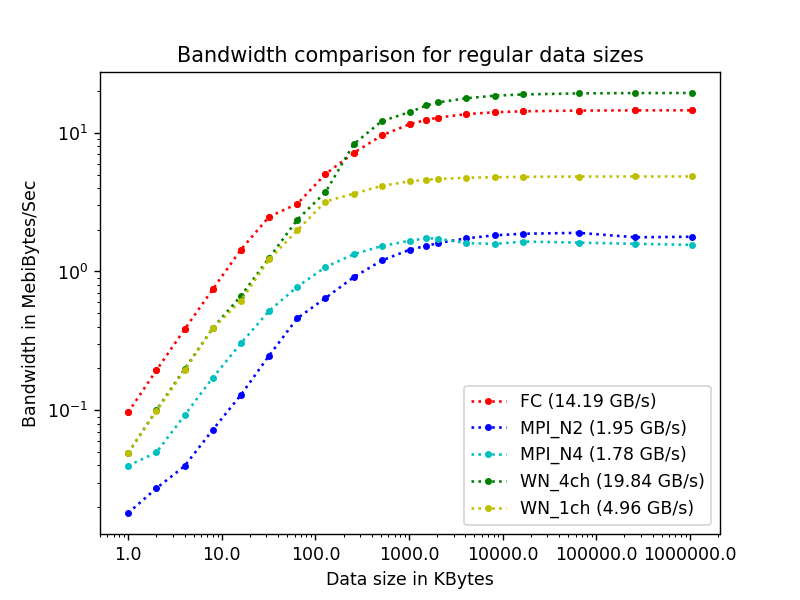

<IPython.core.display.Javascript object>


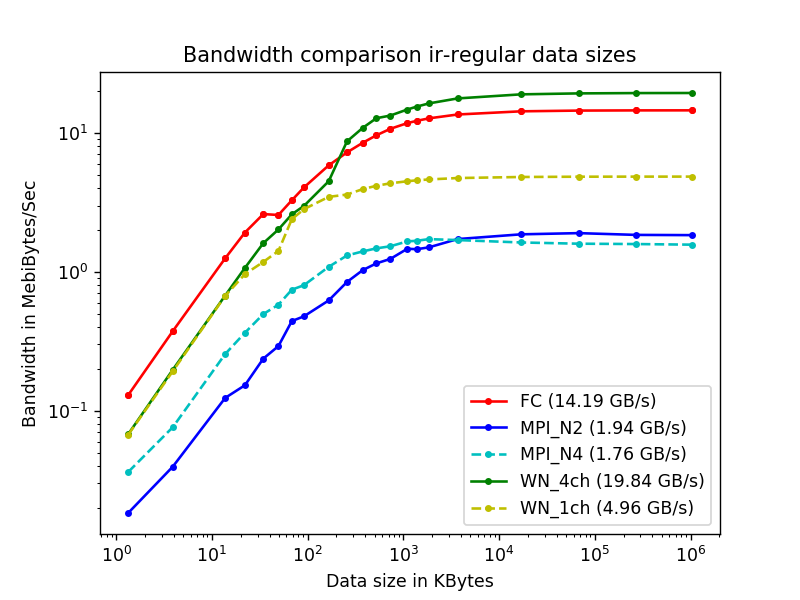

In [35]:
figk_fig1, figk_ax1  = plt.subplots()
figk_fig2, figk_ax2  = plt.subplots()

def format_func(value, tick_number):
    print(value, tick_number)
    return value

Mega = 1024
figk_ax1.loglog(data1['size'].div(1024), data1['meanBw'].div(1024), 'r.:', label='FC (%.2f GB/s)' %(get_max_bw(data1)/1000))
figk_ax1.loglog(data_reg_N2['size'].div(1024), data_reg_N2['avgBw'].div(1024), 'b.:', label='MPI_N2 (%.2f GB/s)' %(get_max_bw(data_reg_N2)/1000))
figk_ax1.loglog(data_reg_N4['size'].div(1024), data_reg_N4['avgBw'].div(1024), 'c.:', label='MPI_N4 (%.2f GB/s)' %(get_max_bw(data_reg_N4)/1000))
figk_ax1.loglog(data_inter_reg_all['size'].div(1024), data_inter_reg_all['avgBw'].div(1024), 'g.:', label='WN_4ch (%.2f GB/s)' %(get_max_bw(data_inter_reg_all)/1000))
figk_ax1.loglog(data_inter_reg['size'].div(1024), data_inter_reg['avgBw'].div(1024), 'y.:', label='WN_1ch (%.2f GB/s)' %(get_max_bw(data_inter_reg)/1000))
# figk_ax1.axhline(y=4768/1024, linestyle='--', color='k', label='max_1ch (%.2f GB/s)' % 5)
# figk_ax1.axhline(y=19073.486328125/1024, linestyle='--', color='m', label='max_4ch (%.2f GB/s)' % 20)
# figk_ax1.axhline(y=14305.11474609375/1024, linestyle='--', color='darkorange', label='max_3ch (%.2f GB/s)' % 15)
locs = figk_ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_func))           # Get locations and labels
# labels = figk_ax1.get_xticklabels()
# print(locs)
# print(labels)
# xticks(ticks, [labels], **kwargs)  # Set locations and labels
# figk_ax2.plot(data4['size'].div(1024), data4['avgBw'], 'r', label='full_connect_il')
figk_ax2.loglog(data3['size'].div(1024), data3['meanBw'].div(1024), 'r.-', label='FC (%.2f GB/s)' %(get_max_bw(data3)/1000))
figk_ax2.loglog(data_irreg_N2['size'].div(1024), data_irreg_N2['avgBw'].div(1024), 'b.-', label='MPI_N2 (%.2f GB/s)' %(get_max_bw(data_irreg_N2)/1000))
figk_ax2.loglog(data_irreg_N4['size'].div(1024), data_irreg_N4['avgBw'].div(1024), 'c.--', label='MPI_N4 (%.2f GB/s)' %(get_max_bw(data_irreg_N4)/1000))
figk_ax2.loglog(data_inter_irreg_all['size'].div(1024), data_inter_irreg_all['avgBw'].div(1024), 'g.-', label='WN_4ch (%.2f GB/s)' %(get_max_bw(data_inter_irreg_all)/1000))
figk_ax2.loglog(data_inter_irreg['size'].div(1024), data_inter_irreg['avgBw'].div(1024), 'y.--', label='WN_1ch (%.2f GB/s)' %(get_max_bw(data_inter_irreg)/1000))
# figk_ax2.axhline(y=4768/1024, linestyle='--', color='k', label='max_1ch (%.2f GB/s)' % 5)

# figk_ax2.axhline(y=14305.11474609375/1024, linestyle='--', color='darkorange', label='theoretical_max_3ch')

# # figk_ax3.plot(data1['size'].div(1024), data_irreg_N2['avgBw']/data_irreg_N4['avgBw'], 'r', label='full_connect_banked')

# figk_ax2.axhline(y=19073.486328125/1024, linestyle='--', color='m', label='theoretical_max_4ch')


figk_ax1.set_xlabel('Data size in KBytes')
figk_ax1.set_ylabel('Bandwidth in MebiBytes/Sec')
figk_ax1.set_title("\n".join(wrap("Bandwidth comparison for regular data sizes", 60)))
figk_ax1.legend()
figk_ax2.set_xlabel('Data size in KBytes')
figk_ax2.set_ylabel('Bandwidth in MebiBytes/Sec')
figk_ax2.set_title("\n".join(wrap("Bandwidth comparison ir-regular data sizes", 60)))
figk_ax2.legend()

<IPython.core.display.Javascript object>


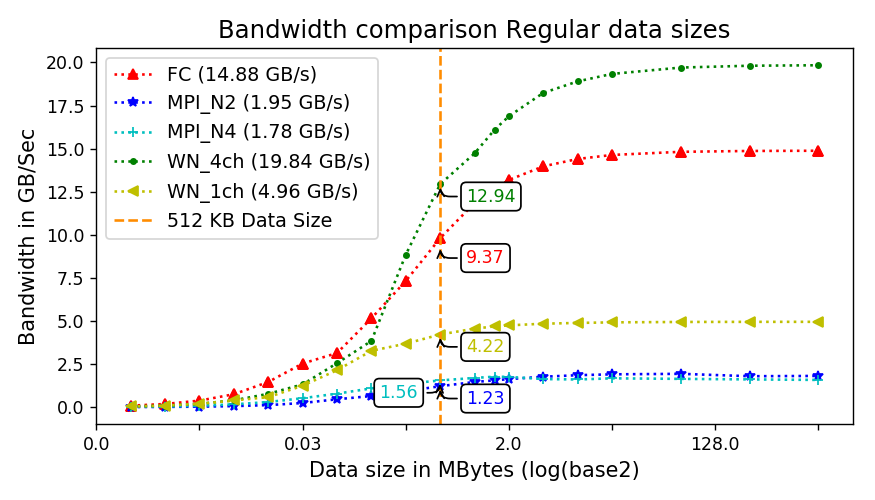

<IPython.core.display.Javascript object>


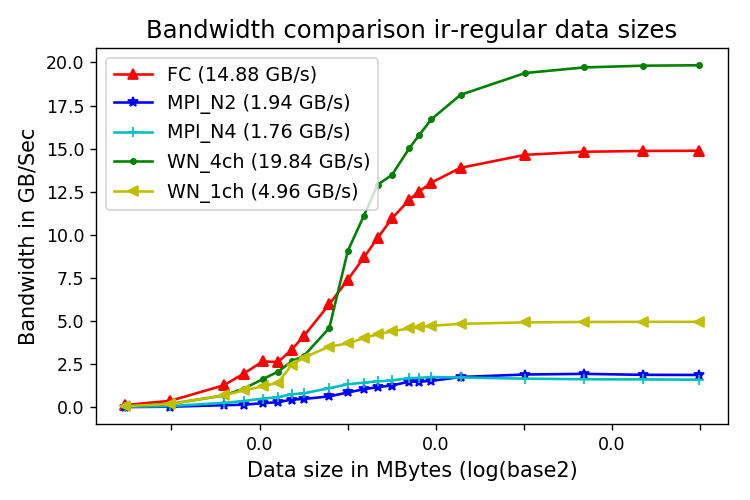

524288.0:9374.83
524288.0:1229.65458944
524288.0:1563.19612928
524288.0:12941.60887808
524288.0:4224.95387648
24    13187.033334
25    13187.033334
Name: meanBw, dtype: float64
12    1639.930921
Name: avgBw, dtype: float64
12    1765.81247
Name: avgBw, dtype: float64
12    16880.699965
Name: avgBw, dtype: float64
12    4755.732562
Name: avgBw, dtype: float64


In [169]:
figk_fig1, figk_ax1  = plt.subplots(figsize=(7,4), tight_layout=True)
figk_fig2, figk_ax2  = plt.subplots(figsize=(6,4), tight_layout=True)
def format_xaxis(value, tick_number):
#     if()
    datasize = float("{0:.2f}".format(value/(1024*1024)))
#     print(value, tick_number, datasize)
    return datasize
def find_add_patch(data, fig, ax, value, color, xytext=(15,-10)):
    for index, entry in data[['size', 'avgBw']].iterrows():
#     print("out"+str(entry['avgBw']))
        if entry['size'] == value:
            print(str(entry['size'])+":"+str(entry['avgBw']))
#             el = circle((entry['size'],entry['avgBw']), 0.02,fig, ax, {'color':color, 'clip_on': False})
#             el = patches.Circle(xy=(entry['size'], entry['avgBw']/1000), radius=5000)
#             ax.add_patch(el)
#             figk_ax.axvline(x=(entry['size']/(1024)), linestyle='--', color='m')
            ax.annotate(float("{0:.2f}".format(entry['avgBw']/1000)), xy=(entry['size'], entry['avgBw']/1000), color=color,
                             xycoords='data', xytext=xytext,
                             textcoords='offset points', bbox=dict(boxstyle="round", fc="1"),
                            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))
            break

Mega = 1024
figk_ax1.plot(data1['size'], data1['meanBw'].div(1000), 'r^:', label='FC (%.2f GB/s)' %(get_max_mbw(data1)/1000))
figk_ax1.plot(data_reg_N2['size'], data_reg_N2['avgBw'].div(1000), 'b*:', label='MPI_N2 (%.2f GB/s)' %(get_max_bw(data_reg_N2)/1000))
figk_ax1.plot(data_reg_N4['size'], data_reg_N4['avgBw'].div(1000), 'c+:', label='MPI_N4 (%.2f GB/s)' %(get_max_bw(data_reg_N4)/1000))
figk_ax1.plot(data_inter_reg_all['size'], data_inter_reg_all['avgBw'].div(1000), 'g.:', label='WN_4ch (%.2f GB/s)' %(get_max_bw(data_inter_reg_all)/1000))
figk_ax1.plot(data_inter_reg['size'], data_inter_reg['avgBw'].div(1000), 'y<:', label='WN_1ch (%.2f GB/s)' %(get_max_bw(data_inter_reg)/1000))


find_add_patch(data1, figk_fig1,figk_ax1, 524288, 'r')
find_add_patch(data_reg_N2, figk_fig1,figk_ax1, 524288, 'b')
find_add_patch(data_reg_N4, figk_fig1,figk_ax1, 524288, 'c', xytext=(-35,-10))
find_add_patch(data_inter_reg_all, figk_fig1,figk_ax1, 524288, 'g')
find_add_patch(data_inter_reg, figk_fig1,figk_ax1, 524288, 'y')


x = data1[data1['size']==2097152]
print(x['meanBw'])
x = data_reg_N2[data_reg_N2['size']==2097152]
print(x['avgBw'])
x = data_reg_N4[data_reg_N4['size']==2097152]
print(x['avgBw'])
x = data_inter_reg_all[data_inter_reg_all['size']==2097152]
print(x['avgBw'])
x = data_inter_reg[data_inter_reg['size']==2097152]
print(x['avgBw'])


figk_ax1.set_xscale('log', basex=2)
figk_ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
for label in figk_ax1.get_xticklabels()[::2]:
    label.set_visible(False)

figk_ax2.plot(data3['size'].div(1024*1024), data3['meanBw'].div(1000), 'r^-', label='FC (%.2f GB/s)' %(get_max_mbw(data3)/1000))
figk_ax2.plot(data_irreg_N2['size'].div(1024*1024), data_irreg_N2['avgBw'].div(1000), 'b*-', label='MPI_N2 (%.2f GB/s)' %(get_max_bw(data_irreg_N2)/1000))
figk_ax2.plot(data_irreg_N4['size'].div(1024*1024), data_irreg_N4['avgBw'].div(1000), 'c+-', label='MPI_N4 (%.2f GB/s)' %(get_max_bw(data_irreg_N4)/1000))
figk_ax2.plot(data_inter_irreg_all['size'].div(1024*1024), data_inter_irreg_all['avgBw'].div(1000), 'g.-', label='WN_4ch (%.2f GB/s)' %(get_max_bw(data_inter_irreg_all)/1000))
figk_ax2.plot(data_inter_irreg['size'].div(1024*1024), data_inter_irreg['avgBw'].div(1000), 'y<-', label='WN_1ch (%.2f GB/s)' %(get_max_bw(data_inter_irreg)/1000))
# figk_ax2.axhline(y=4768/1024, linestyle='--', color='k', label='max_1ch (%.2f GB/s)' % 5)
figk_ax2.set_xscale('log', basex=2)
figk_ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
for label in figk_ax2.get_xticklabels()[::2]:
    label.set_visible(False)

# idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
figk_ax1.axvline(x=524288.0, linestyle='--', color='darkorange', label='512 KB Data Size')

# # figk_ax3.plot(data1['size'].div(1024), data_irreg_N2['avgBw']/data_irreg_N4['avgBw'], 'r', label='full_connect_banked')

# figk_ax2.axhline(y=19073.486328125/1024, linestyle='--', color='m', label='theoretical_max_4ch')


figk_ax1.set_xlabel('Data size in MBytes (log(base2)')
figk_ax1.set_ylabel('Bandwidth in GB/Sec')
figk_ax1.set_title("\n".join(wrap("Bandwidth comparison Regular data sizes", 60)))
figk_ax1.legend()
figk_ax2.set_xlabel('Data size in MBytes (log(base2)')
figk_ax2.set_ylabel('Bandwidth in GB/Sec')
figk_ax2.set_title("\n".join(wrap("Bandwidth comparison ir-regular data sizes", 60)))
figk_ax2.legend()

figk_fig1.savefig("allreg.pgf")
figk_fig1.savefig("allreg.pdf")
figk_fig2.savefig("allirreg.pgf")
figk_fig2.savefig("allirreg.pdf")

In [22]:
# plt.savefig("wn1ch.pdf")

<IPython.core.display.Javascript object>


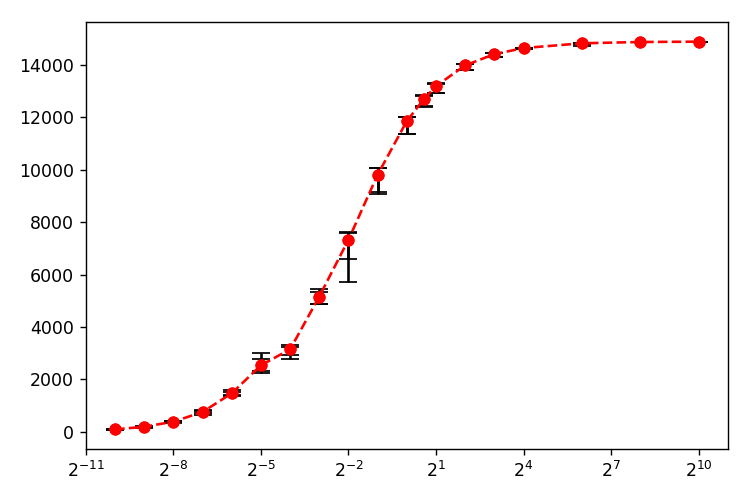

<ErrorbarContainer object of 3 artists>

In [38]:

# print(data1)
err = data1[['min','max']].T.values

figk_fig1, figk_ax1  = plt.subplots(figsize=(6,4), tight_layout=True)
# figk_fig2, figk_ax2  = plt.subplots(figsize=(6,4), tight_layout=True)

figk_ax1.set_xscale('log', basex=2)
# Mega = 1024
figk_ax1.errorbar(data1['size'].div(1024*1024), data1['meanBw'], yerr=err, color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
# figk_ax1.errorbar(data1['size'].div(1024*1024), data1['meanBw'].div(1000), 'r^:',
#                   label='FC (%.2f GB/s)' %(get_max_mbw(data1)/1000),
#                    yerr=err)
